In [3]:
import requests

import numpy as np
import matplotlib.pyplot as plt
import gif

In [4]:
requests.get('http://127.0.0.1:8001/status').json()

{'status': 'OK'}

In [8]:
requests.get('http://127.0.0.1:8001/experiment').json()

[]

In [16]:
test_data = {
    'params': {
        'a': {'type': 'log', 'parameters': dict(lower=0.01, upper=1.0)},
    },
    'optimizer': 'BO'
}
new_experiment = requests.post('http://127.0.0.1:8001/experiment', json=test_data).json()
new_experiment_id = new_experiment['experiment_id']
new_experiment_id

'3da99b69-2630-4cd8-a9ac-a3709aa5037b'

In [5]:
requests.get(f'http://127.0.0.1:8001/experiment/41444{new_experiment_id}').json()

{'status': 'Experiment with such ID not Found'}

In [6]:
requests.get(f'http://127.0.0.1:8001/experiment/{new_experiment_id}/ask').json()

{'a': 0.10893036085449838}

In [7]:
requests.get(f'http://127.0.0.1:8001/experiment/{new_experiment_id}').json()

{'n evaluated points': 0, 'recommended point': {'a': 0.10000000000000002}}

In [8]:
requests.delete(f'http://127.0.0.1:8001/experiment/{new_experiment_id}').json()

{'status': 'OK'}

Text(0, 0.5, 'y')

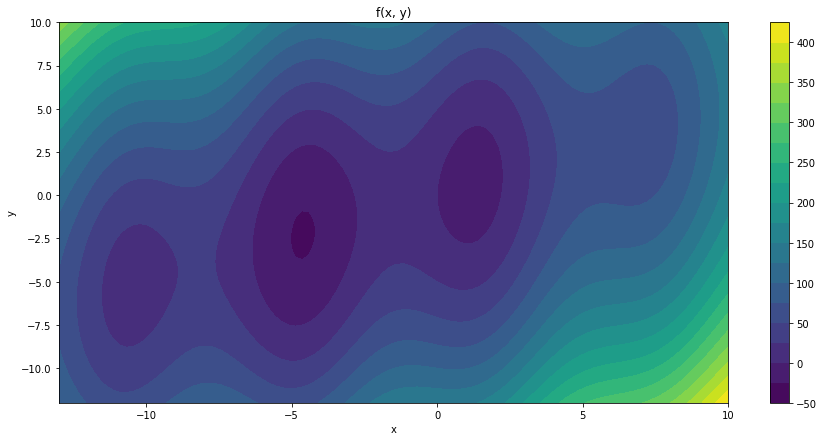

In [6]:
def f(a, b):
    return a**2 + b**2 - a*b - 20*np.sin(a) + 5*a

a = np.linspace(-13, 10, 100)
b = np.linspace(-12, 10, 100)

x, y = np.meshgrid(a, b)

z = f(x, y)

plt.figure(figsize=(15, 7))
plt.contourf(x, y, z, levels=20)
plt.colorbar()
plt.title('f(x, y)')
plt.xlabel('x')
plt.ylabel('y')

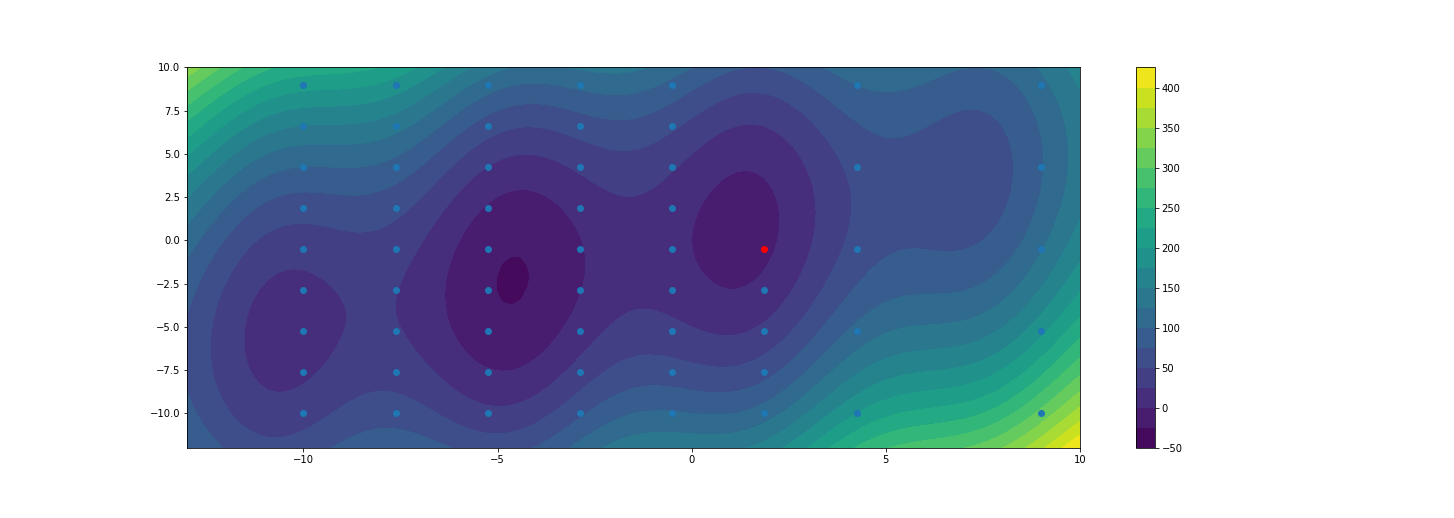

{'a': 1.8749999999999998, 'b': -0.5}
-5.003590632193879
{'status': 'OK'}


In [7]:
from IPython.display import clear_output
test_data = {
    'params': {
        'a': {'type': 'scalar', 'parameters': dict(lower=-10, upper=9)},
        'b': {'type': 'scalar', 'parameters': dict(lower=-10, upper=9)},
#         'b': {'type': 'срш', 'parameters': dict(lower=-10, upper=10)},
        
    },
    'optimizer': 'GridSearch',
#     'optimizer': 'BO',
#     'optimizer': 'RandomSearch',
#     'optimizer': 'OnePlusOne',
}
new_experiment = requests.post('http://127.0.0.1:8001/experiment', json=test_data).json()
new_experiment_id = new_experiment['experiment_id']
new_experiment_id

@gif.frame
def get_frame(asked):
    plt.figure(figsize=(20, 7))
    plt.contourf(x, y, z, levels=20)
    plt.colorbar()
    plt.scatter(*np.array(asked)[:, :-1])
    plt.scatter(*np.array(asked)[:, -1], color='red')

frames = []
asked = [[], []]
for i in range(60):
    clear_output(wait=True)
    asked_point = requests.get(f'http://127.0.0.1:8001/experiment/{new_experiment_id}/ask').json()
#     print(asked_point)
    asked[0].append(asked_point['a'])
    asked[1].append(asked_point['b'])
    
    frames.append(get_frame(asked))
    plt.figure(figsize=(20, 7))
    plt.axes([0,0,1,1])
    plt.imshow(frames[-1])
    plt.axis('off')
    plt.show()
    
    print(asked_point)
    f_a = f(**asked_point)
    print(f_a)
    tell_info = {
        'point': asked_point,
        'value': f_a
    }
    tell_resp = requests.post(f'http://127.0.0.1:8001/experiment/{new_experiment_id}/tell', json=tell_info).json()
    print(tell_resp)
gif.save(frames, "example.gif", duration=200)

In [56]:
new_experiment_id

'4f945d06-b5fa-45b0-90c8-2f853d733e54'

![SegmentLocal](example.gif "example")

In [17]:
new_experiment_id

'76e408d7-f2b9-4e52-b729-80254ddc70f9'

In [8]:
status = requests.get(f'http://127.0.0.1:8001/experiment/{new_experiment_id}').json()
status

{'n evaluated points': 60, 'recommended point': {'a': -5.25, 'b': -2.875}}

In [10]:
f(**status['recommended point'])

-23.73622959686447

In [7]:
f(**status['recommended point'])

-11.539785152965345